In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os

from matplotlib import font_manager, rc

from google.colab import drive
drive.mount('/content/gdriv')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

data_path = "/content/gdriv/My Drive/Colab Notebooks/Data" 

Drive already mounted at /content/gdriv; to attempt to forcibly remount, call drive.mount("/content/gdriv", force_remount=True).
Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 14 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache dire

In [ ]:
gs_dt = pd.read_csv(data_path + '/GS_retail.csv')
gs_dt.head()

,PVN,BOR,ADMD,20190201,20190202,20190203,20190204,20190205,20190206,20190207,20190208,20190209,20190210,20190211,20190212,20190213,20190214,20190215,20190216,20190217,20190218,20190219,20190220,20190221,20190222,20190223,20190224,20190225,20190226,20190227,20190228,20190301,20190302,20190303,20190304,20190305,20190306,20190307,20190308,20190309,...,20200422,20200423,20200424,20200425,20200426,20200427,20200428,20200429,20200430,20200501,20200502,20200503,20200504,20200505,20200506,20200507,20200508,20200509,20200510,20200511,20200512,20200513,20200514,20200515,20200516,20200517,20200518,20200519,20200520,20200521,20200522,20200523,20200524,20200525,20200526,20200527,20200528,20200529,20200530,20200531
0,전체,NaN,NaN,1.198007,1.017985,0.963684,0.918759,1.028130,0.900022,1.062491,1.150977,1.068972,1.000571,1.131853,1.186448,1.320001,1.617031,1.190969,1.068105,0.956199,1.105568,1.115470,1.145820,1.155013,1.191533,1.130534,1.050177,1.137895,1.164265,1.196417,1.228623,1.115550,1.068384,0.979494,1.122856,1.156601,1.168720,1.179032,1.221120,1.170290,...,0.915683,0.940819,0.974563,0.900325,0.838383,0.948927,0.997949,1.047825,0.950804,0.944291,0.908584,0.839550,0.988878,0.820135,1.010333,1.052052,1.119884,0.859814,0.857811,1.010680,0.995473,1.035820,1.052277,1.026313,0.975814,0.890252,1.039224,0.986584,1.038070,1.045068,1.080985,1.020417,0.885803,1.021254,1.067526,1.063149,1.076086,1.137684,1.045754,0.928725
1,서울특별시,NaN,NaN,1.188696,1.004386,0.953775,0.899579,1.036262,0.892765,1.079589,1.190902,1.091591,1.031777,1.181275,1.236460,1.376542,1.685503,1.244231,1.092032,0.985666,1.151187,1.171804,1.203918,1.214433,1.251433,1.167415,1.088427,1.195758,1.219484,1.251139,1.282034,1.160439,1.084714,1.003910,1.210981,1.245348,1.260456,1.275782,1.312469,1.212088,...,0.995239,1.029271,1.048302,0.942878,0.894498,1.034296,1.081837,1.132640,1.006817,0.989888,0.936633,0.910709,1.051793,0.860086,1.097112,1.146503,1.208619,0.889991,0.889773,1.080236,1.065220,1.109276,1.140106,1.102369,1.005920,0.926904,1.130130,1.064682,1.123700,1.138778,1.162798,1.078928,0.930147,1.098651,1.143194,1.147769,1.169708,1.226083,1.110484,0.978101
2,서울특별시,중구,NaN,1.379749,1.037523,1.013265,0.898529,1.003199,0.892831,1.264520,1.443271,1.216018,1.100608,1.424161,1.496089,1.640486,2.029650,1.485207,1.205817,1.049309,1.412560,1.454037,1.462232,1.512464,1.518401,1.304621,1.138562,1.465689,1.517309,1.550937,1.575467,1.362825,1.183939,1.003881,1.430642,1.543659,1.562308,1.587453,1.608544,1.327792,...,1.086456,1.124508,1.120379,0.828013,0.741704,1.128614,1.185448,1.228588,0.958654,0.928329,0.832010,0.770743,1.042770,0.772463,1.181637,1.244722,1.274158,0.793121,0.721088,1.162563,1.162184,1.192649,1.221825,1.169248,0.905517,0.791064,1.271476,1.170644,1.213602,1.241314,1.230307,0.998263,0.777919,1.186941,1.259630,1.243106,1.289460,1.295647,1.002761,0.849583
3,서울특별시,중구,소공동,1.668360,1.115390,1.211998,1.033635,1.112612,1.054682,1.834032,1.992160,1.313661,1.022908,1.921260,2.079297,2.305587,3.151760,1.936436,1.233032,1.097007,1.834670,1.914184,1.939816,2.007111,1.994794,1.489048,1.167345,1.915019,1.952679,2.011817,2.156084,1.741618,1.314422,0.988942,1.912716,2.026977,2.028831,2.164629,2.139739,1.439720,...,1.338541,1.429594,1.327991,0.715183,0.582003,1.346638,1.434019,1.553026,0.849605,0.814311,0.726847,0.631916,1.145716,0.570691,1.432181,1.508317,1.617982,0.634398,0.535024,1.311783,1.388513,1.390182,1.493677,1.350118,0.772551,0.584795,1.553582,1.437594,1.427772,1.475551,1.484447,0.819555,0.608719,1.334733,1.475264,1.499739,1.566971,1.491554,0.785321,0.680223
4,서울특별시,중구,회현동,1.216539,1.231600,1.216814,1.264384,1.245211,1.186977,1.185489,1.464250,1.149388,1.416945,1.547571,1.624344,1.682814,2.289957,1.563455,1.206883,1.306164,1.555544,1.634082,1.516687,1.649898,1.540248,1.511313,1.485741,1.570186,1.596314,1.600601,1.618615,1.371091,1.312757,1.282680,1.555866,1.607532,1.616764,1.793539,1.588166,1.522599,...,1.133254,1.114545,1.119086,0.669988,0.708250,1.228516,1.220611,1.203926,0.983797,0.994342,

In [ ]:
print(gs_dt.columns)

Index(['PVN', 'BOR', 'ADMD', '20190201', '20190202', '20190203', '20190204',
       '20190205', '20190206', '20190207',
       ...
       '20200522', '20200523', '20200524', '20200525', '20200526', '20200527',
       '20200528', '20200529', '20200530', '20200531'],
      dtype='object', length=244)


In [ ]:
period_01 = gs_dt.iloc[:, 5:33]
period_02 = gs_dt.iloc[:, 33:61]
period_03 = gs_dt.iloc[:, 61:89]
period_04 = gs_dt.iloc[:, 89:117]

period_01 = pd.concat([gs_dt.iloc[:,2], period_01], axis = 1)
period_02 = pd.concat([gs_dt.iloc[:,2], period_02], axis = 1)
period_03 = pd.concat([gs_dt.iloc[:,2], period_03], axis = 1)
period_04 = pd.concat([gs_dt.iloc[:,2], period_04], axis = 1)

period_01 = period_01.dropna(axis=0)
period_02 = period_02.dropna(axis=0)
period_03 = period_03.dropna(axis=0)
period_04 = period_04.dropna(axis=0)

period01 = period_01.iloc[:, 1:]
period02 = period_02.iloc[:, 1:]
period03 = period_03.iloc[:, 1:]
period04 = period_04.iloc[:, 1:]

p1 = np.array(period01)
p2 = np.array(period02)
p3 = np.array(period03)
p4 = np.array(period04)
index = np.array(period_01.iloc[:,0])
P0 = p1 + p2 + p3 + p4
p0 = pd.DataFrame(P0)
p0

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,4.722481,7.068850,7.568250,6.710402,8.328908,8.740225,6.726149,5.221294,6.944029,8.696998,8.932921,11.396467,8.492968,5.451057,4.976161,7.833601,8.290184,8.720053,8.798408,8.658406,6.185690,5.084349,7.914899,8.323373,8.528391,8.793678,8.500576,6.358911
1,5.263388,6.038953,6.215940,5.835508,6.398779,6.267000,5.613493,6.294846,6.079838,6.732600,6.746949,8.303984,6.597973,5.565469,6.048684,6.390248,6.681771,6.844167,6.638057,6.439494,5.855163,6.266851,6.514213,6.613653,6.691299,6.783430,6.395546,5.954247
2,3.973384,5.946800,6.467483,5.838462,6.921435,7.233445,5.039388,4.503754,6.003727,7.073016,7.350106,8.857141,6.988610,5.132260,4.170363,6.906979,7.114165,7.457997,7.164074,7.251975,5.252929,4.380651,7.037521,7.355011,7.218393,7.453656,7.036995,5.046526
3,3.674867,5.017085,5.546171,4.893462,5.837546,6.122700,4.605404,3.807059,5.194065,6.292803,6.224096,7.410064,6.377973,4.738975,4.099426,5.783623,6.290987,6.594138,6.309244,6.181723,4.851969,4.133564,5.915192,6.176447,6.368736,6.536745,5.974086,4.692198
4,3.402232,3.426416,3.573791,3.537246,3.568408,3.625322,3.681607,3.540393,3.511381,3.638613,3.589907,4.059420,3.776955,3.997044,3.687576,3.770218,3.834704,3.917196,3.843485,3.927078,4.093176,3.907032,3.836389,3.852327,4.171186,4.359903,4.212733,4.054607
5,5.420027,5.903590,6.142719,6.169655,6.754261,7.243136,8.254804,6.546347,6.197183,6.649095,7.111687,8.394054,7.430866,7.986462,6.055180,6.806674,7.122730,7.878917,7.999326,7.996945,7.981924,6.509166,6.820575,7.292570,7.466743,7.739012,7.556595,7.201344
6,6.092448,6.610171,7.324495,6.775232,7.615696,8.034528,7.079516,6.576784,7.319271,7.264925,7.526864,8.026135,7.764196,7.022713,6.486330,7.375705,7.452547,7.926613,7.760912,7.919470,7.394455,6.832064,7.325048,7.824456,7.663128,8.243763,7.750848,7.515339
7,4.210421,6.281338,6.865720,6.699031,7.075403,7.650691,5.594509,4.632959,6.991084,7.626999,8.483379,9.548234,8.004198,5.745484,4.663142,7.529506,8.018103,7.937243,8.002360,8.023529,5.858337,4.765068,7.412580,8.006671,8.124439,7.973105,8.075570,5.919674
8,3.680333,4.735625,5.146079,4.762483,5.516867,5.696562,4.445122,3.880946,4.749494,5.755738,5.788344,6.792712,5.720150,4.613141,3.947095,5.433489,5.647756,5.650529,5.660759,5.700222,4.771919,3.907586,5.428056,5.517566,5.608018,5.787796,5.433947,4.711297
9,4.998019,4.678683,4.958241,4.826328,4.563076,5.242996,5.289076,5.206827,4.513070,4.481891,4.689690,5.243082,5.173030,5.326826,5.353611,4.562338,4.626669,4.831800,4.902963,5.125757,5.586910,5.083499,4.624872,4.618777,4.708741,4.753099,5.033613,5.517557


In [ ]:
from sklearn.preprocessing import minmax_scale
scaled_train = minmax_scale(P0, axis=1, copy=True)
scaled_train

array([[0.        , 0.3515693 , 0.42639716, ..., 0.61000972, 0.56609273,
        0.24519529],
       [0.        , 0.25506995, 0.31327823, ..., 0.49991582, 0.37234746,
        0.22721177],
       [0.        , 0.40407746, 0.51069285, ..., 0.7126219 , 0.62730619,
        0.21973709],
       ...,
       [0.49167706, 0.        , 0.27319701, ..., 0.36846644, 0.37777028,
        0.84962807],
       [0.35552762, 0.39359698, 0.55860628, ..., 0.30345991, 0.28363798,
        0.53744123],
       [0.40654982, 0.13535899, 0.35841742, ..., 0.37800217, 0.60890084,
        0.75892329]])

In [ ]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=4)
res = model.fit(scaled_train)

In [ ]:
res.score(scaled_train)

-33.12660826379147

In [ ]:
score = []
plt.rcParams['figure.figsize'] = (20, 10)
for i in range(2,30):
  model = KMeans(n_clusters=i)
  res = model.fit(scaled_train)
  score.append(res.score(scaled_train))
print(score)

[-45.24867384232248, -36.55792116050691, -33.23960989955411, -30.420769004961933, -27.84202835419897, -26.956080336593196, -24.79812892895313, -23.399796578425974, -21.919352765541856, -21.32512905804506, -20.25486533044862, -19.180177772364075, -17.961308119465865, -17.2034651237524, -16.34882662019716, -15.455092975517216, -14.618324730401048, -14.002772790340451, -13.445296923037642, -12.833852559595348, -12.206635577009777, -11.426352362993242, -10.946583423786883, -10.398804367161025, -9.850886157103954, -9.612897010573416, -8.948432088882658, -8.556589657497298]


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


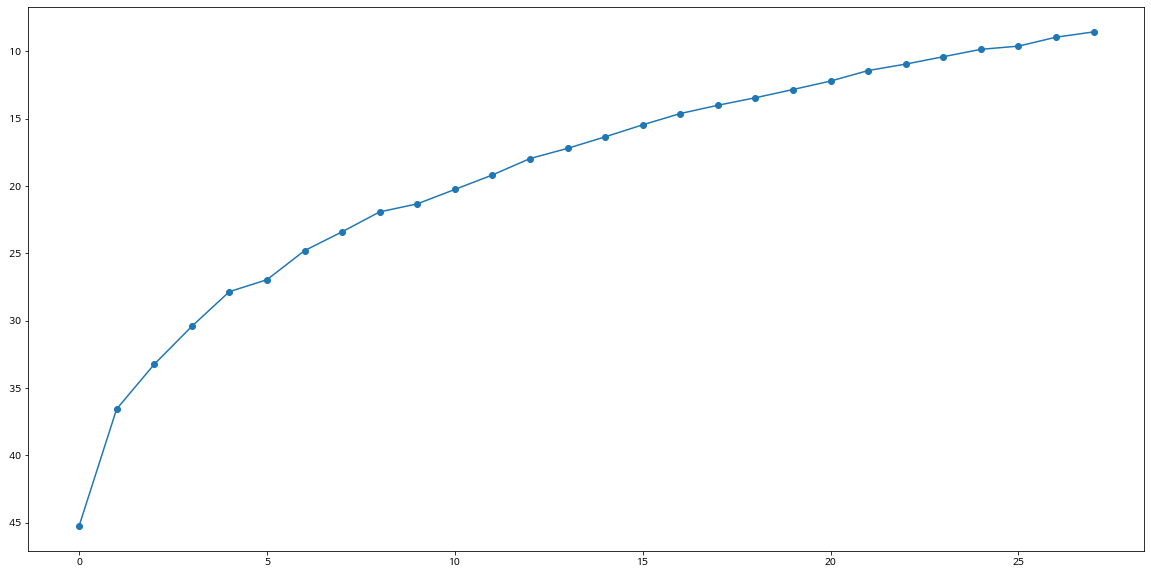

In [ ]:
plt.plot(score, marker = 'o')

In [ ]:
model = KMeans(n_clusters=4)

In [ ]:
res = model.fit(scaled_train)

res.labels_

array([1, 3, 1, 1, 3, 2, 1, 1, 1, 0, 3, 0, 1, 0, 0, 1, 3, 0, 3, 0, 3, 0,
       0, 0, 3, 3, 0, 3, 0, 0, 0, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 2, 0, 0, 3], dtype=int32)

In [ ]:
name = pd.DataFrame(index).reset_index(drop=True)
name

,0
0,소공동
1,회현동
2,명동
3,필동
4,장충동
5,광희동
6,을지로동
7,신당동
8,다산동
9,약수동


In [ ]:
name = pd.DataFrame(index).reset_index(drop=True)
cluster_res = pd.concat([name,pd.DataFrame(res.labels_)],axis=1)
cluster_res.columns = ['name','cluster']
cluster_res

,name,cluster
0,소공동,1
1,회현동,3
2,명동,1
3,필동,1
4,장충동,3
5,광희동,2
6,을지로동,1
7,신당동,1
8,다산동,1
9,약수동,0


In [ ]:
cluster_dt = pd.concat([cluster_res,pd.DataFrame(scaled_train)],axis=1)
print(cluster_dt)

       name  cluster         0  ...        25        26        27
0       소공동        1  0.000000  ...  0.610010  0.566093  0.245195
1       회현동        3  0.000000  ...  0.499916  0.372347  0.227212
2        명동        1  0.000000  ...  0.712622  0.627306  0.219737
3        필동        1  0.000000  ...  0.766192  0.615555  0.272363
4       장충동        3  0.000000  ...  1.000000  0.846326  0.681211
5       광희동        2  0.000000  ...  0.779746  0.718409  0.598958
6      을지로동        1  0.000000  ...  1.000000  0.770877  0.661405
7       신당동        1  0.000000  ...  0.704911  0.724107  0.320216
8       다산동        1  0.000000  ...  0.677123  0.563432  0.331246
9       약수동        0  0.467076  ...  0.245433  0.499288  0.937238
10      청구동        3  0.272194  ...  0.426935  0.509573  0.428551
11     신당5동        0  0.336464  ...  0.462914  0.595840  0.611140
12      동화동        1  0.039967  ...  0.742721  0.691070  0.313946
13      황학동        0  0.367023  ...  0.505646  0.729131  0.990704
14      중림

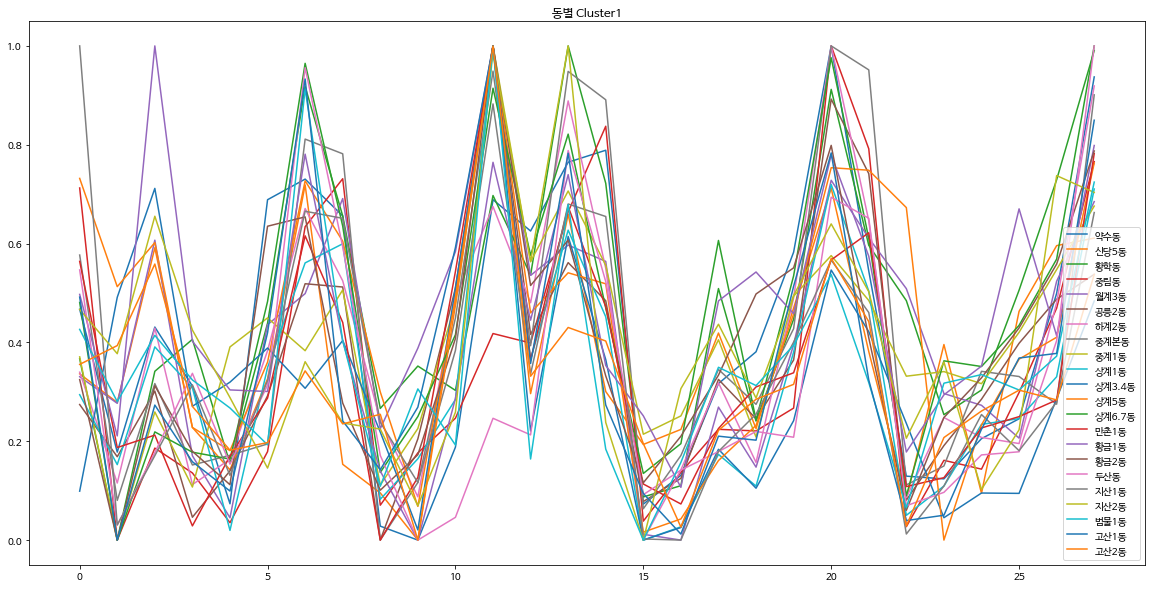

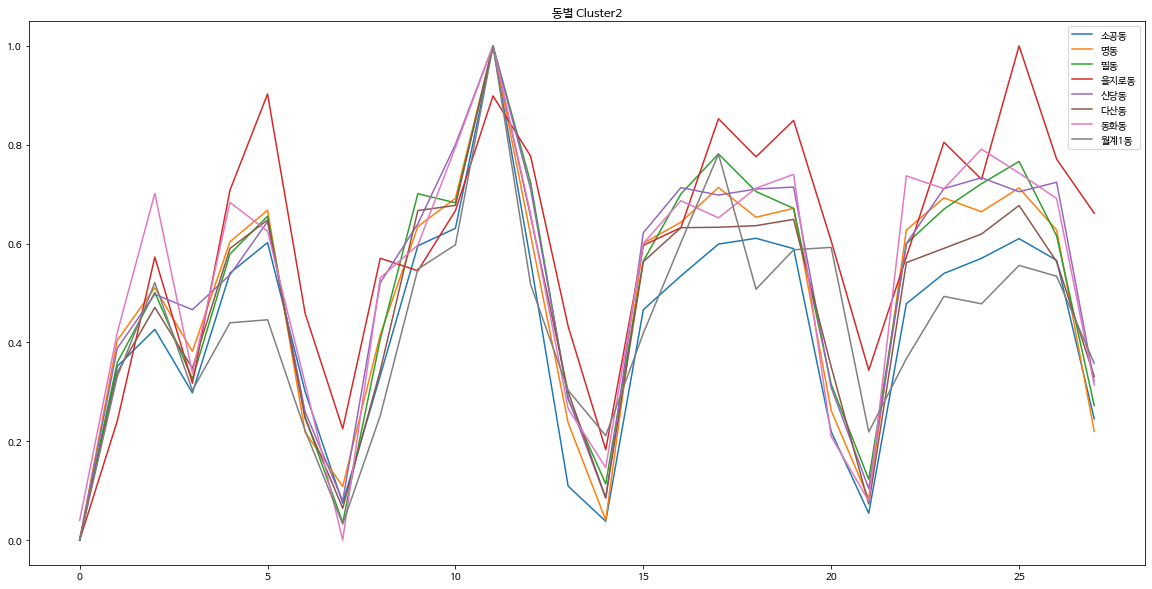

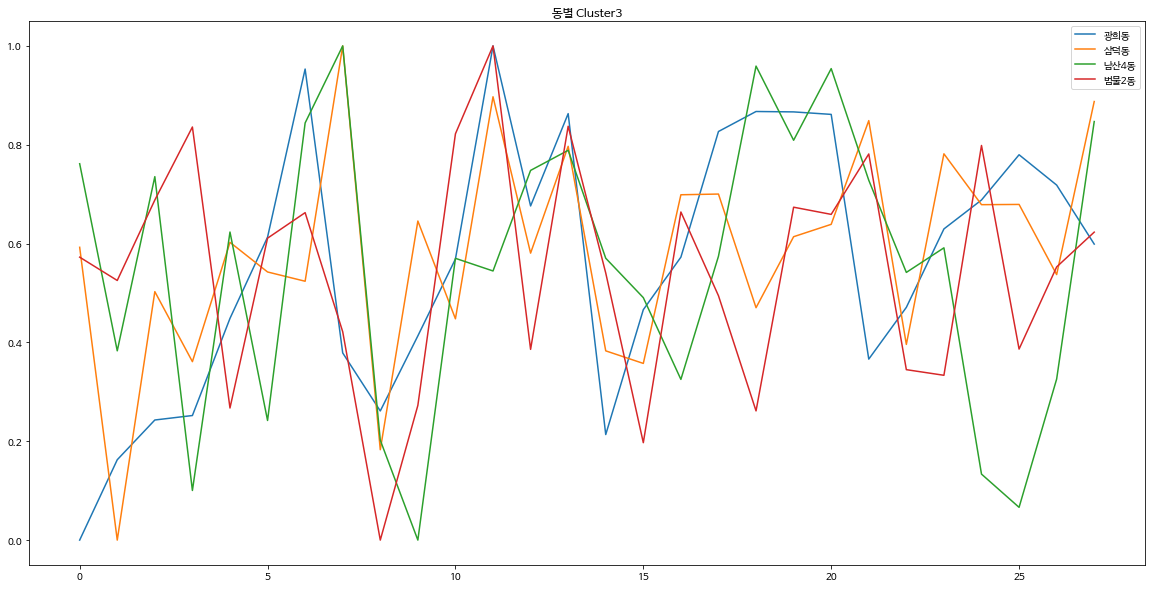

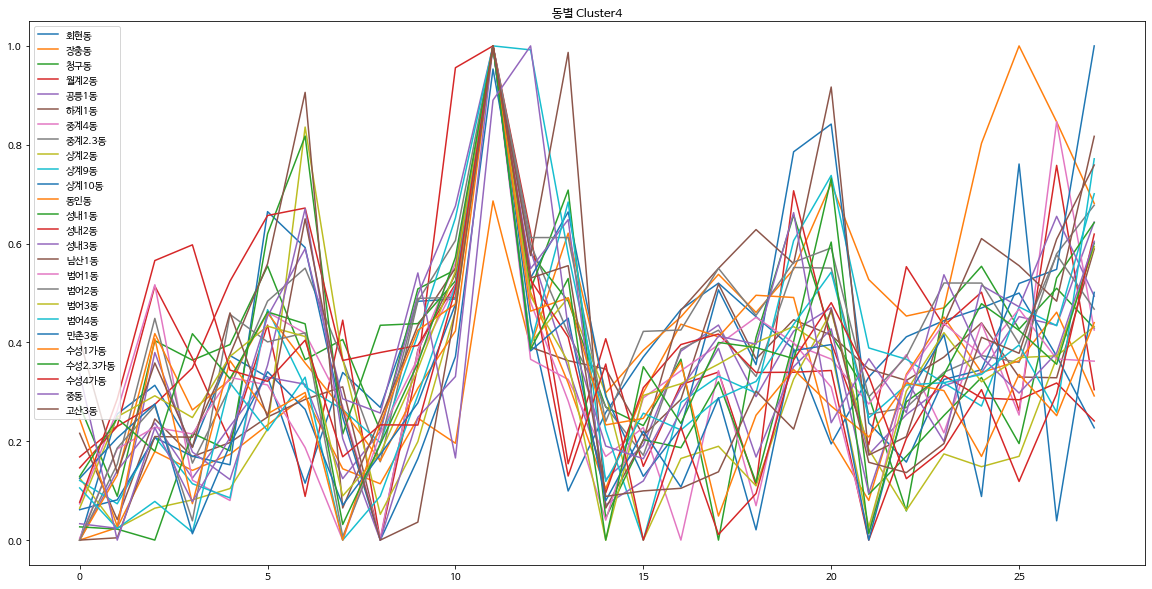

In [ ]:
for k in range(4): # k는 군집수
  cluster0 = cluster_dt.loc[cluster_dt['cluster']==k,:]
  idx = cluster0['name']
  cluster = cluster0.iloc[:,2:].reset_index(drop=True)
  for i in range(len(cluster)):
    plt.plot(cluster.iloc[i,:])
    plt.title('동별 Cluster' + str(k+1))
  
  plt.legend(idx)
  plt.show()